In [ ]:
!pip install visualkeras

In [54]:
import time
import math
import visualkeras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras.models import Sequential, load_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

Reading the Dataset

In [9]:
fashion_train = pd.read_csv("/content/fashion-mnist_train.csv")
fashion_test = pd.read_csv("/content/fashion-mnist_test.csv")


Dataset

In [15]:
print('Train: ', fashion_train.shape)
print('Test: ', fashion_test.shape)

Train:  (60000, 785)
Test:  (10000, 785)


Extraction and Preprocessing

In [34]:
# Extraction of features and labels
X_train = fashion_train.drop('label', axis=1).astype('float32')
y_train = fashion_train['label'].values
X_test = fashion_test.drop('label', axis=1).astype('float32')
y_test = fashion_test['label'].values


In [35]:
# Normalizeing the data
X_train /= 255
X_test /= 255

# Reshaping the data for layer
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)



Classes of Fashion Mnist

In [38]:
#Indexing the classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

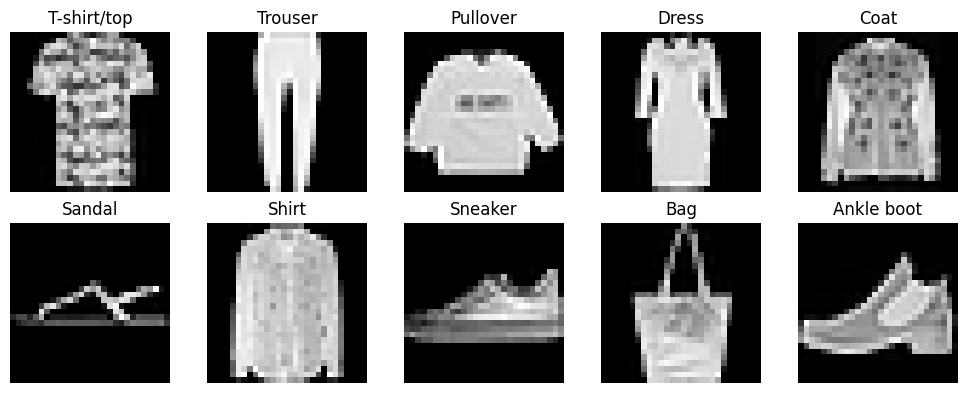

In [53]:
num_classes = 10

# Creating a figure with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flattenning the array of axes
flat_axes = axes.flatten()

for class_id in range(num_classes):
    index = fashion_train[fashion_train['label'] == class_id].index[0]
    image_data = fashion_train.iloc[index, 1:].values.reshape(28, 28)
    label = fashion_train.iloc[index, 0]

    # Displaying the images on the corresponding subplot
    ax = flat_axes[class_id]
    ax.imshow(image_data, cmap='gray')
    ax.set_title(clothing[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

Building the Convolutional Neural Network

In [40]:
num_classes = 10
n_epochs = 50

In [41]:
# The model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid', strides=(1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid', strides=(1, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Compilation and Summary

In [42]:
# Printing the model summary
model.summary()

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
hist = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, validation_split=0.05)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

Prediction, Accuracy, and Classification Report

In [43]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the values from the test dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


Test Accuracy: 92.11%
313/313 [==============================] - 3s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.85      0.88      1000
           3       0.93      0.93      0.93      1000
           4       0.85      0.90      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.75      0.80      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Learning Curves

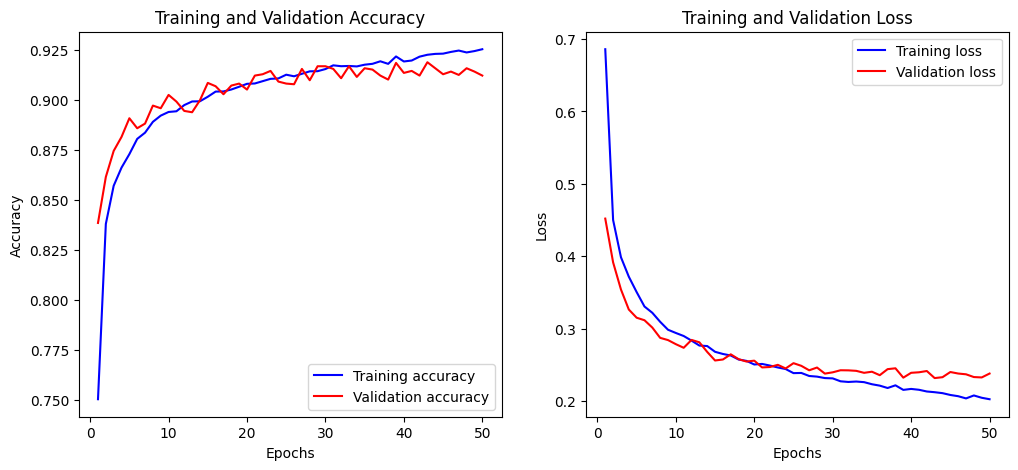

In [44]:
import matplotlib.pyplot as plt

# Extracting data from the history object
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting for accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Correctly Predicted Classes

313/313 [==============================] - 3s 10ms/step


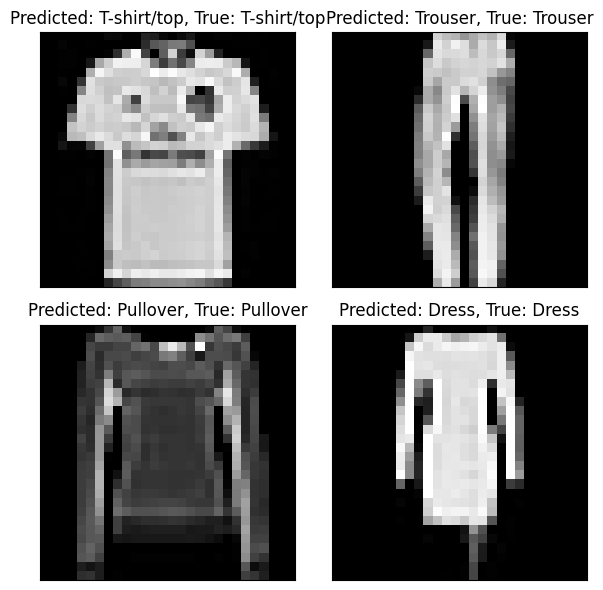

In [59]:

y_pred = model.predict(X_test)

# Converting predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Correctly classified indices
correct_indices = np.nonzero(y_pred_classes == y_test)[0]

# Number of images to display
n_images = 4

# Creating a dictionary for label names
label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Plotting the first n_images correctly classified images
plt.figure(figsize=(6, 6))
for i, correct in enumerate(correct_indices[:n_images]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {label_names[y_pred_classes[correct]]}, True: {label_names[y_test[correct]]}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Incorrectly Predicted Classes

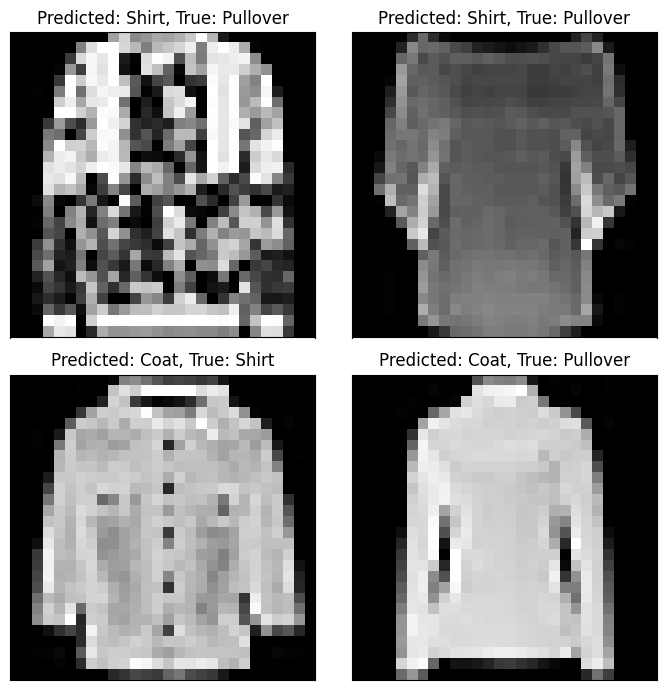

In [60]:
#Incorrected classified images

incorrect_indices = np.nonzero(y_pred_classes != y_test)[0]
n_images = 4
label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Plotting the first n_images incorrectly classified images
plt.figure(figsize=(7, 7))
for i, incorrect in enumerate(incorrect_indices[:n_images]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {label_names[y_pred_classes[incorrect]]}, True: {label_names[y_test[incorrect]]}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Confusion Matrix

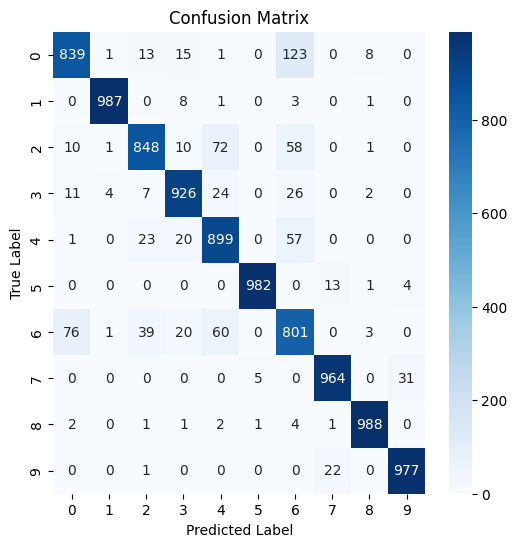

In [58]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.regularizers import L2

# Initializing the Sequential model
model = Sequential()

# Running the input layer with the shape of the Fashion-MNIST images
model.add(Input(shape=(28, 28)))

# Flattening
model.add(Flatten())

# Adding a Dense layer with L2 regularization
model.add(Dense(128, activation='sigmoid', kernel_regularizer=L2(0.001)))

# Adding another Dense layer with L2 regularization
model.add(Dense(128, activation='sigmoid', kernel_regularizer=L2(0.001)))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist2 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, validation_split=0.05)

Epoch 1/50
446/446 [==============================] - 9s 14ms/step - loss: 1.1480 - accuracy: 0.7155 - val_loss: 0.8341 - val_accuracy: 0.7960
Epoch 2/50
446/446 [==============================] - 3s 6ms/step - loss: 0.7694 - accuracy: 0.8101 - val_loss: 0.7490 - val_accuracy: 0.8090
Epoch 3/50
446/446 [==============================] - 4s 9ms/step - loss: 0.7095 - accuracy: 0.8215 - val_loss: 0.7077 - val_accuracy: 0.8177
Epoch 4/50
446/446 [==============================] - 3s 6ms/step - loss: 0.6778 - accuracy: 0.8252 - val_loss: 0.6944 - val_accuracy: 0.8177
Epoch 5/50
446/446 [==============================] - 3s 8ms/step - loss: 0.6606 - accuracy: 0.8282 - val_loss: 0.6591 - val_accuracy: 0.8250
Epoch 6/50
446/446 [==============================] - 3s 6ms/step - loss: 0.6460 - accuracy: 0.8304 - val_loss: 0.6734 - val_accuracy: 0.8183
Epoch 7/50
446/446 [==============================] - 5s 11ms/step - loss: 0.6367 - accuracy: 0.8304 - val_loss: 0.6529 - val_accuracy: 0.8227
Epoc

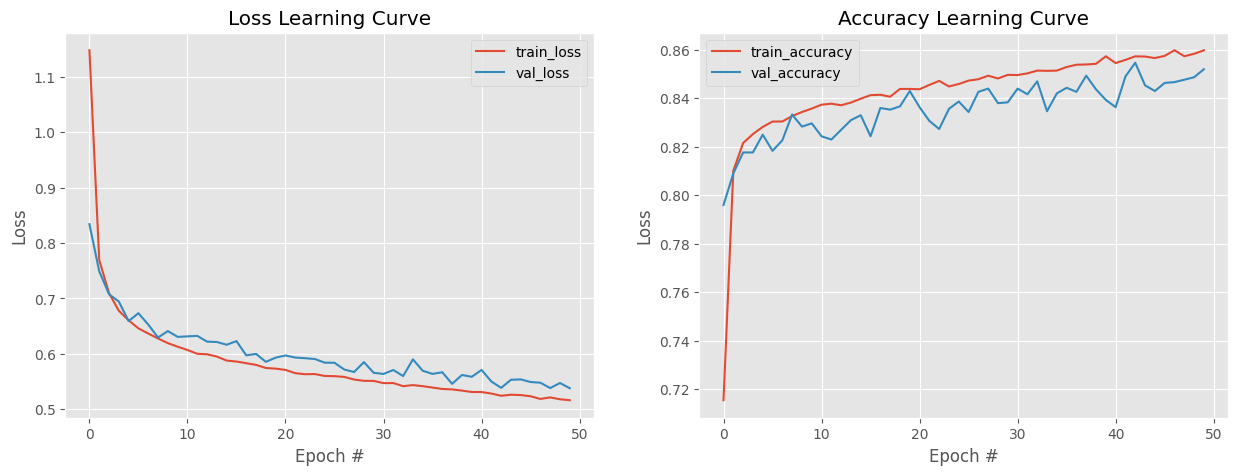

In [82]:
# ploting the training loss and accuracy
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(0, n_epochs), hist2.history['loss'], label='train_loss')
plt.plot(np.arange(0, n_epochs), hist2.history['val_loss'], label='val_loss')
plt.title('Loss Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, n_epochs), hist2.history['accuracy'], label='train_accuracy')
plt.plot(np.arange(0, n_epochs), hist2.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.show()